# 📊 Análise de Desempenho das Lojas - Alura Store
Este notebook apresenta a análise dos dados de 4 lojas da Alura Store para recomendar qual loja vender com base em dados como faturamento, avaliação, categorias, produtos vendidos e frete.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_4.csv"

lojas = {
    'Loja 1': pd.read_csv(url1),
    'Loja 2': pd.read_csv(url2),
    'Loja 3': pd.read_csv(url3),
    'Loja 4': pd.read_csv(url4),
}

for nome, df in lojas.items():
    df['Preço'] = df['Preço'].astype(str).str.replace('R$', '', regex=False).str.replace(',', '.', regex=False).astype(float)
    df['Frete'] = df['Frete'].astype(str).str.replace('R$', '', regex=False).str.replace(',', '.', regex=False).astype(float)



## 💰 Análise do Faturamento

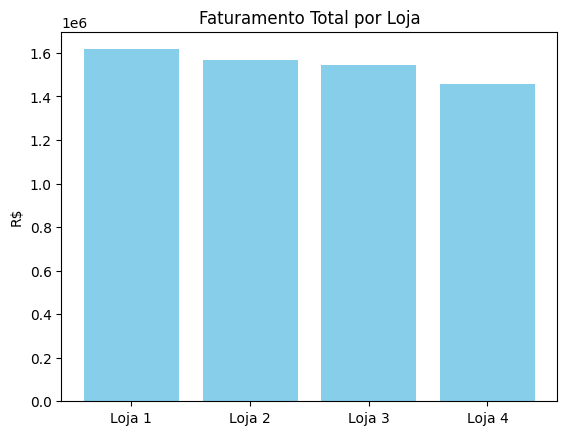

Loja 1: R$ 1,616,347.09
Loja 2: R$ 1,567,773.22
Loja 3: R$ 1,542,047.69
Loja 4: R$ 1,458,253.46


In [3]:
faturamento = {nome: (df['Preço'] + df['Frete']).sum() for nome, df in lojas.items()}

plt.bar(faturamento.keys(), faturamento.values(), color='skyblue')
plt.title('Faturamento Total por Loja')
plt.ylabel('R$')
plt.show()

for loja, valor in faturamento.items():
    print(f"{loja}: R$ {valor:,.2f}")


## 🛍️ Vendas por Categorias

In [4]:
categorias = {}
for nome, df in lojas.items():
    categoria_principal = df['Categoria do Produto'].value_counts(normalize=True).idxmax()
    percentual = df['Categoria do Produto'].value_counts(normalize=True).max() * 100
    categorias[nome] = (categoria_principal, percentual)

for loja, (categoria, perc) in categorias.items():
    print(f"{loja}: {categoria} ({perc:.1f}%)")


Loja 1: moveis (19.7%)
Loja 2: moveis (18.7%)
Loja 3: moveis (21.2%)
Loja 4: moveis (20.4%)


## ⭐ Média de Avaliação das Lojas

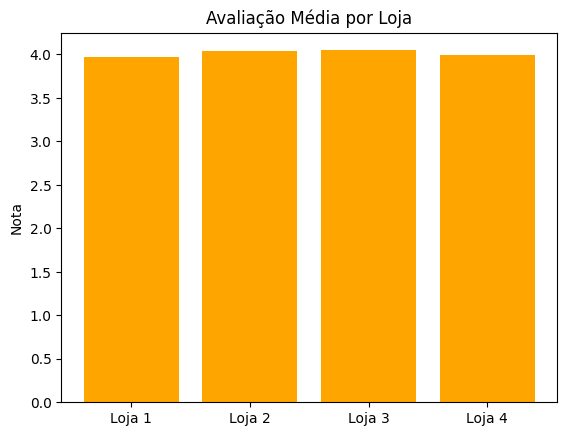

Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


In [5]:
avaliacoes = {nome: df['Avaliação da compra'].mean() for nome, df in lojas.items()}

plt.bar(avaliacoes.keys(), avaliacoes.values(), color='orange')
plt.title('Avaliação Média por Loja')
plt.ylabel('Nota')
plt.show()

for loja, nota in avaliacoes.items():
    print(f"{loja}: {nota:.2f}")


## 🏆 Produtos Mais e Menos Vendidos

In [6]:
mais_vendidos = {}
menos_vendidos = {}

for nome, df in lojas.items():
    contagem = df['Produto'].value_counts()
    mais_vendidos[nome] = contagem.idxmax()
    menos_vendidos[nome] = contagem.idxmin()

print("Produto Mais Vendido:")
for loja, produto in mais_vendidos.items():
    print(f"{loja}: {produto}")

print("\nProduto Menos Vendido:")
for loja, produto in menos_vendidos.items():
    print(f"{loja}: {produto}")


Produto Mais Vendido:
Loja 1: Micro-ondas
Loja 2: Iniciando em programação
Loja 3: Kit banquetas
Loja 4: Cama box

Produto Menos Vendido:
Loja 1: Headset
Loja 2: Jogo de tabuleiro
Loja 3: Blocos de montar
Loja 4: Guitarra


## 🚚 Frete Médio por Loja

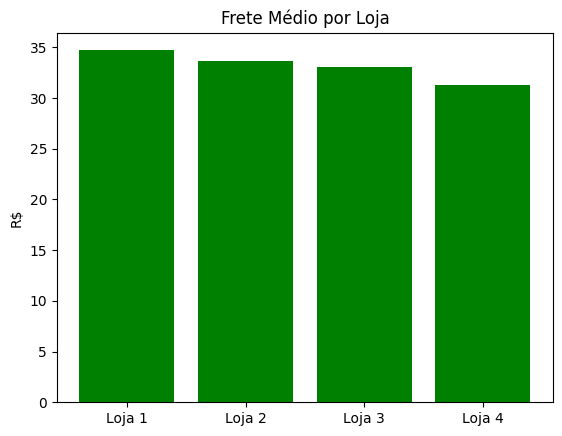

Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


In [7]:
frete_medio = {nome: df['Frete'].mean() for nome, df in lojas.items()}

plt.bar(frete_medio.keys(), frete_medio.values(), color='green')
plt.title('Frete Médio por Loja')
plt.ylabel('R$')
plt.show()

for loja, frete in frete_medio.items():
    print(f"{loja}: R$ {frete:.2f}")


## 🧠 Recomendação Final

In [9]:
pior_loja = min(faturamento, key=faturamento.get)

print(f"A loja com pior desempenho geral é a **{pior_loja}**.")
print("Ela apresenta menor faturamento.E a média de avaliação não é tão boa.")
print("Recomenda-se vendê-la para focar em lojas com melhor performance.")


A loja com pior desempenho geral é a **Loja 4**.
Ela apresenta menor faturamento.E a média de avaliação não é tão boa.
Recomenda-se vendê-la para focar em lojas com melhor performance.
